In [ ]:
# Task 1: Exploratory Data Analysis (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('/content/wine.csv')

# Show the first 5 rows of the dataset
df.head()



,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# Display basic information about the dataset
print(df.info())

# Check for any missing values
print(df.isnull().sum())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity        

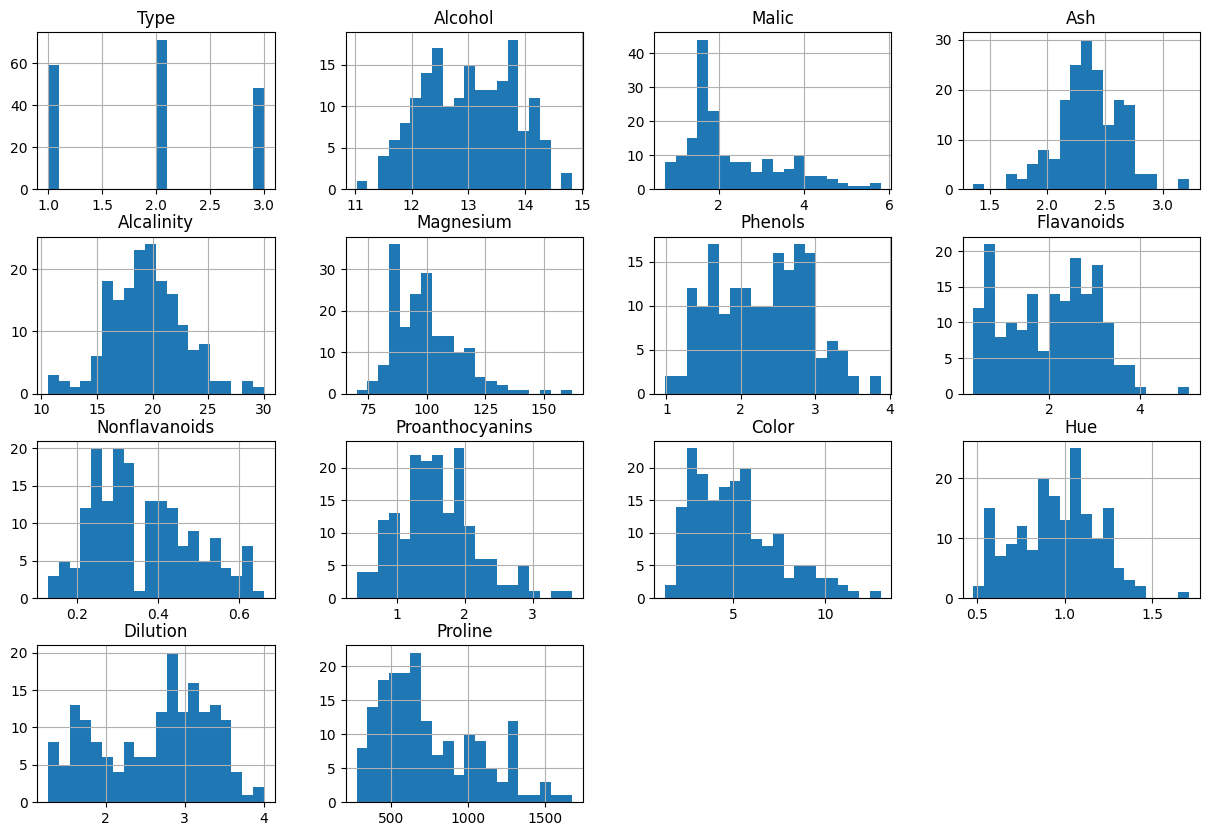

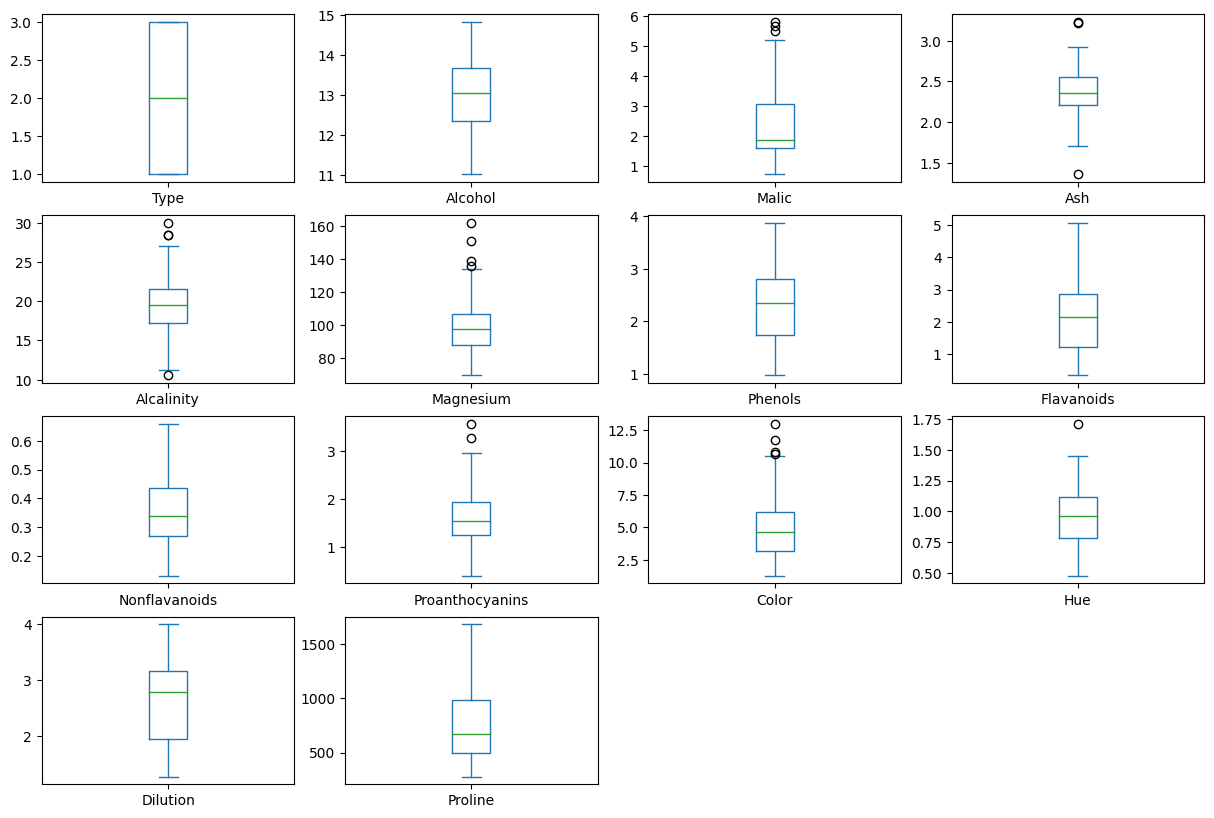

In [ ]:
# Histogram for each feature
df.hist(bins=20, figsize=(15, 10))
plt.show()

# Boxplot for each feature
df.plot(kind='box', figsize=(15, 10), subplots=True, layout=(4, 4), sharex=False, sharey=False)
plt.show()



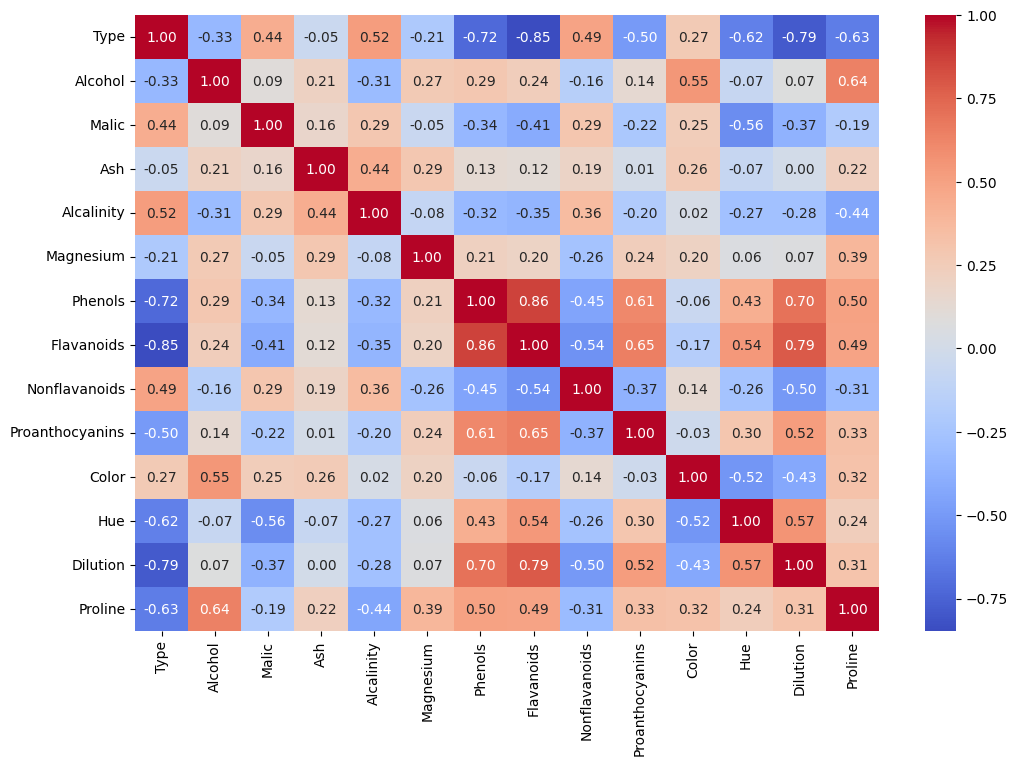

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()



## Task 2: Dimensionality Reduction with PCA


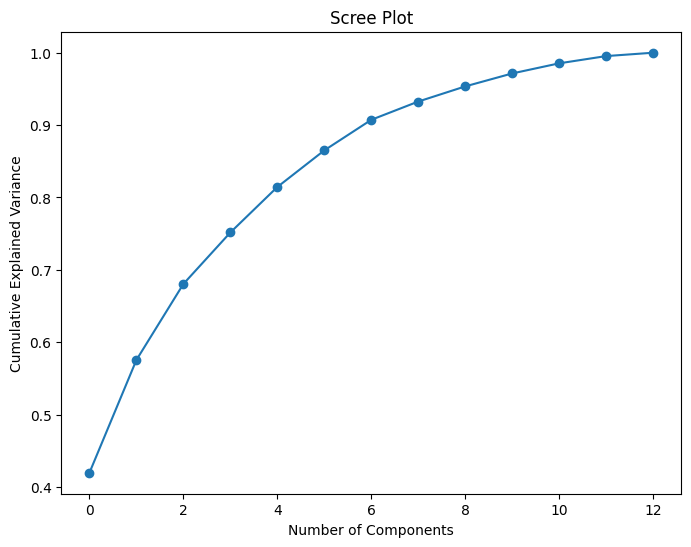

[[-3.31049     1.20531167]
 [-2.512443   -0.667054  ]
 [-2.74230813  1.49811831]
 [-3.63540255  2.53920355]
 [-1.35965797  1.33689884]]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate features from labels (assuming the first column is labels)
X = df.drop(columns=['Alcohol'])  # Modify 'Alcohol' if it's not the label
y = df['Alcohol']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Plot the explained variance ratio (scree plot)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

# Reduce the dataset to the first 2 principal components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Show the transformed data
print(X_pca[:5])



## Task 3: Clustering with Original Data

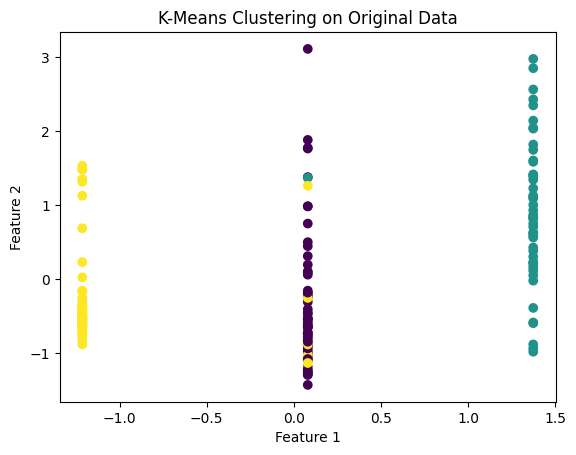

Silhouette Score for Original Data: 0.28628258889905817


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply K-Means clustering to the original scaled dataset
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original data
df['Cluster_Original'] = cluster_labels

# Scatter plot of two features with clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering on Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Silhouette Score
silhouette_original = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score for Original Data: {silhouette_original}')



## Task 4: Clustering with PCA Data


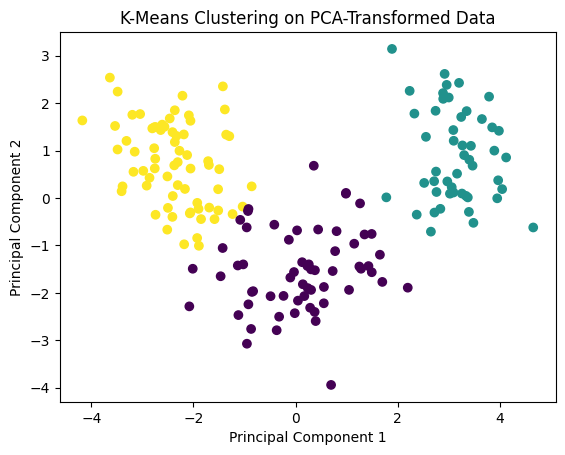

Silhouette Score for PCA Data: 0.5551828206132293


In [ ]:
# Apply K-means clustering to PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(X_pca)

# Get the cluster labels
cluster_labels_pca = kmeans_pca.labels_

# Add the cluster labels to the PCA-transformed data
df['Cluster_PCA'] = cluster_labels_pca

# Scatter plot of PCA components with clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_pca, cmap='viridis')
plt.title('K-Means Clustering on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Silhouette Score for PCA Data
silhouette_pca = silhouette_score(X_pca, cluster_labels_pca)
print(f'Silhouette Score for PCA Data: {silhouette_pca}')



# Task 5: Comparison and Analysis


In [ ]:
# Compare clustering results
print(f'Silhouette Score for Original Data: {silhouette_original}')
print(f'Silhouette Score for PCA Data: {silhouette_pca}')



Silhouette Score for Original Data: 0.28628258889905817
Silhouette Score for PCA Data: 0.5551828206132293


# Task 6: Conclusion and Insights
# Summarize key findings
# PCA helps in reducing dimensionality and may improve clustering performance